## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# pingouin 패키지 (통계분석 관련)
import pingouin as pg

# SciPy 패키지
import scipy
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지
from scipy.stats import randint, uniform  # 균일한 이산 확률 변수 및 연속 확률 변수

# scikit-learn 패키지
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.plotting import plot_pca_correlation_graph  # PCA(주성분 분석) Correlation Circle 시각화

#
####################################################################################

## 데이터 불러오기 및 데이터프레임 생성

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\rawdata\iris.csv')
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
x = df.iloc[:, 0:4]
y = df.iloc[:, 4]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# PCA (Principal Component Analysis)

## PCA 수행 전 변수 표준화

- 주성분 분석은 상관 행렬과 공분산 행렬 중 하나를 택하여 주성분을 추출할 수 있다.


- 공분산 행렬을 이용한 주성분 분석
  - 각 변수의 척도에 영향을 받는다.
  - 따라서 사전에 변수 표준화 과정이 필요 → 표준화 변수에 대한 공분산 행렬은 상관 행렬과 같다.


- 상관 행렬을 이용한 주성분 분석
  - 상관계수에 기초한 주성분 분석 방법
  - 상관 행렬의 척도 불변성으로 인해 개별 변수의 단위에 영향을 받지 않는다.
  - 각 변수의 측정 단위를 임의의 단위로 변경하는 것과 같기 때문에, 측정단위가 동일한 자료인 경우 공분산 행렬에 기초한 주성분 분석이 더 타당하다.

In [5]:
scaled = StandardScaler().fit_transform( x )

x_scaled = x.copy()

for i in range(0, x.columns.size):
    x_scaled.iloc[:, i] = scaled[:, i]
    
x_scaled

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## PCA 모델 생성 및 적합

- `sklearn.decomposition`  
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition


- `sklearn.decomposition.PCA( n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None )`
  - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
  - Attributes :
    - `.components_` : 데이터의 최대 분산 방향을 나타내는 feature space의 주성분 축.
    - `.explained_variance_` : 선택한 각 구성 요소에서 설명하는 분산의 양
    - `.explained_variance_ratio_` : 선택한 각 구성 요소가 설명하는 분산의 백분율
    - `.singular_values_` : 선택한 각 구성 요소에 해당하는 특이값
    - `.n_components_`

In [7]:
# 주성분 개수 설정
k = 4

# 주성분 개수를 k개로 하는 PCA 모델 생성
pca = PCA( n_components = k ) 

# 표준화된 변수에 대해 PCA 수행
x_pca = pca.fit_transform( x_scaled )

## PCA 결과 분석

### Scores (주성분 점수)

- 주성분들의 선형식을 통해 새롭게 계산된 각 행별 좌표를 나타냄

In [8]:
# Scores (주성분 점수)

# 주성분 컬럼명 리스트 생성 ( ['PC1', 'PC2', ....] )
pc_names = []
for i in range( 1, k+1 ):
    pc_names.append( 'PC'+str(i) )

# 주성분 분석결과 데이터프레임 생성
df_pca = pd.DataFrame( x_pca,
                       columns = pc_names)

print('< 주성분 점수 >')
display( df_pca )
print()

print('< 주성분 간의 상관계수 >')
display( df_pca.corr() )

< 주성분 점수 >


,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129



< 주성분 간의 상관계수 >


,PC1,PC2,PC3,PC4
PC1,1.000000e+00,2.398815e-16,-1.108322e-16,4.139055e-17
PC2,2.398815e-16,1.000000e+00,2.783123e-16,4.408221e-17
PC3,-1.108322e-16,2.783123e-16,1.000000e+00,-1.392731e-16
PC4,4.139055e-17,4.408221e-17,-1.392731e-16,1.000000e+00


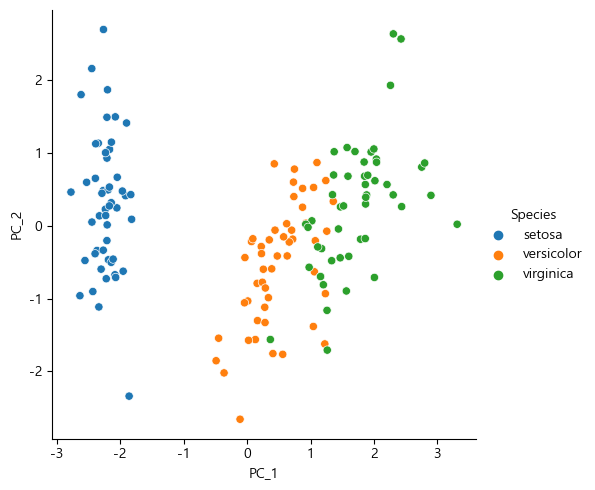

In [9]:
# 주성분에 의해 변환된 새로운 좌표를 주성분 2개를 사용하여 시각화

sb.relplot( x = x_pca[:, 0],
            y = x_pca[:, 1],
            hue = df.iloc[:,4] )

plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.show()

### 주성분의 기여율 (Importance of Components)

- 주성분의 설명력을 의미

- 주성분의 기여율 = (주성분 변수의 분산) / (원 변수들 각각의 분산값의 총합) 

- 1 에 가까울수록 적절하고 0 에 가까울수록 데이터에 대한 설명력이 떨어진다고 판단.

- 첫번째 주성분부터 설명력 비율의 누적합, 즉, 누적 기여율을 계산하여 85% 이상이 되는 시점을 주성분 개수로 정할 수 있다. 

In [10]:
# 주성분 각각의 설명력 및 설명력 비율

pd.DataFrame( {'주성분 별 설명력' : pca.explained_variance_,
               '주성분 별 설명력 비율' : pca.explained_variance_ratio_},
             index = pc_names )

,주성분 별 설명력,주성분 별 설명력 비율
PC1,2.938085,0.729624
PC2,0.920165,0.228508
PC3,0.147742,0.036689
PC4,0.020854,0.005179


#### Scree plot

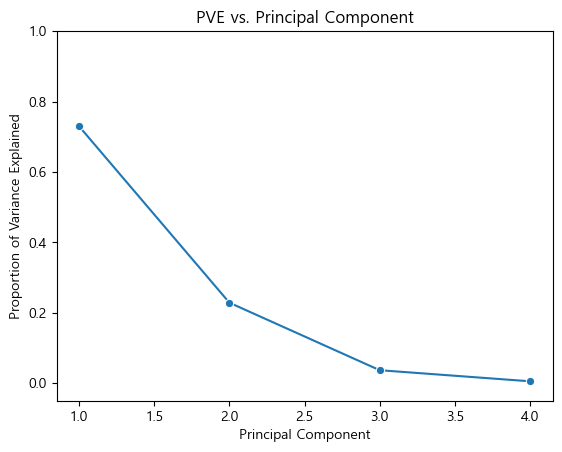

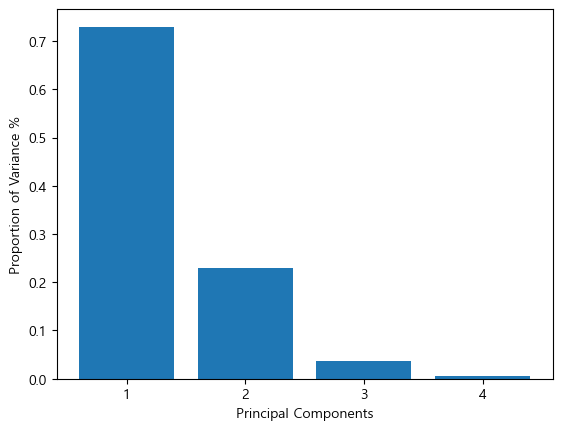

In [11]:
# Plotting the variances for each PC
PC_number = range(1, k+1)
evr = pca.explained_variance_ratio_


# 선 그래프 형식으로 Scree Plot 출력
ax = sb.lineplot( x = PC_number,
                  y = evr,
                  marker="o")

ax.set( title = "PVE vs. Principal Component",
        xlabel = "Principal Component",
        ylabel = "Proportion of Variance Explained",
        ylim = (-0.05, 1) )
plt.show()


# 막대 그래프 형식으로 Scree Plot 출력
plt.bar(PC_number, evr)
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance %')
plt.xticks(PC_number)
plt.show()

### Loadings 

- Loading (주성분 계수) : 각각의 변수가 주성분에 기여하는 가중치

- 예를 들어, 제1주성분에 대한 선형식이  
$PC_1 = φ_{11}x_1+φ_{21}x_2+......+φ_{p1}x_p$  
$PC_2 = φ_{12}x_1+φ_{22}x_2+......+φ_{p2}x_p$일때,  
$φ_1 = (φ_{11}, φ_{21}, ......,φ_{p1})$ 이 제1주성분의 Loading Vector 이다. 

In [12]:
# Loading (주성분 계수) : 각각의 변수가 주성분에 기여하는 가중치

# 주성분 계수 데이터프레임 생성
## 주의!!! index와 column 의 성분을 혼동하면 안됨!!!
## `.components_`결과의 컬럼은 변수이고 행이 주성분임!!

loadings = pd.DataFrame( pca.components_,
                         index = pc_names,  
                         columns = x_scaled.columns )

print('< 주성분의 적재량(Loadings) >')
loadings

< 주성분의 적재량(Loadings) >


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


#### Biplot (주성분에 의한 행렬도)

- 제1주성분과 제2주성분으로 이루어진 좌표평면 상에 주성분 점수들을 산점도로 나타내고, 각 변수에 대한 주성분 계수를 화살표로 시각화 하여 그래프로 표현한 것.
- 즉, 주성분에 의해 변환된 좌표와 Loading Vector 를 한꺼번에 그린다.

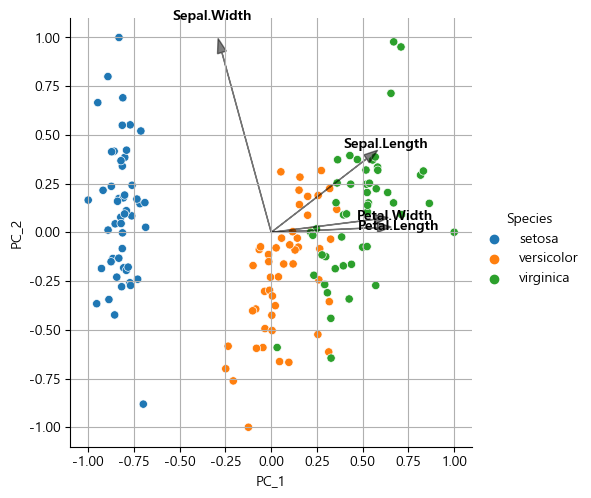

In [13]:
# 주성분에 의해 변환된 새로운 좌표를 주성분 2개를 사용하여 시각화
## Loading Vector 와 동시에 시각화하기 위해 [-1. 1] 범위로 Min-Max 스케일링을 적용한다.

x_pca_StdScl = MinMaxScaler((-1,1)).fit_transform( x_pca )

sb.relplot( x = x_pca_StdScl[:,0],
            y = x_pca_StdScl[:,1],
            hue = df.iloc[:,4] )


# Loading Vector 시각화

coeff = loadings.T.values
labels = loadings.columns

for i in range(0, k):
        plt.arrow( 0, 0,  # 화살표 시작점
                   coeff[i,0], coeff[i,1],  # 화살표 끝점
                   color = 'k', alpha = 0.5, head_width=0.05 )
        
        plt.text( coeff[i,0]* 1.2, coeff[i,1] * 1.2,  # 텍스트가 표시될 위치
                  labels[i],  # 표시할 텍스트
                  color = 'k', fontweight = 'semibold',  ha = 'center', va = 'center')

plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.grid()
plt.show()

### [ 참고 ] PCA Correlation Circle

- `plot_pca_correlation_graph( X, variables_names, dimensions=(1, 2), figure_axis_size=6, X_pca=None, explained_variance=None )`
  - http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/
  - Parameters :
    - X : 2d array like. The columns represent the different variables and the rows are the samples of thos variables.
    - variables_names : array like. X의 열(변수) 이름.
    - dimensions: tuple with two elements. dimensions to be plotted (x,y)
    - figure_axis_size : size of the final frame. The figure created is a square with length and width equal to figure_axis_size.
    - X_pca : Optional. np.ndarray, shape = [n_samples, n_components]. X에서 변환된 component의 행렬.
    - explained_variance : PCA 변환에 대한 대각 공분산 행렬의 고유값.  

< correlation_matrix >


,Dim 1,Dim 2
Sepal.Length,-0.890169,-0.360830
Sepal.Width,0.460143,-0.882716
Petal.Length,-0.991555,-0.023415
Petal.Width,-0.964979,-0.064000


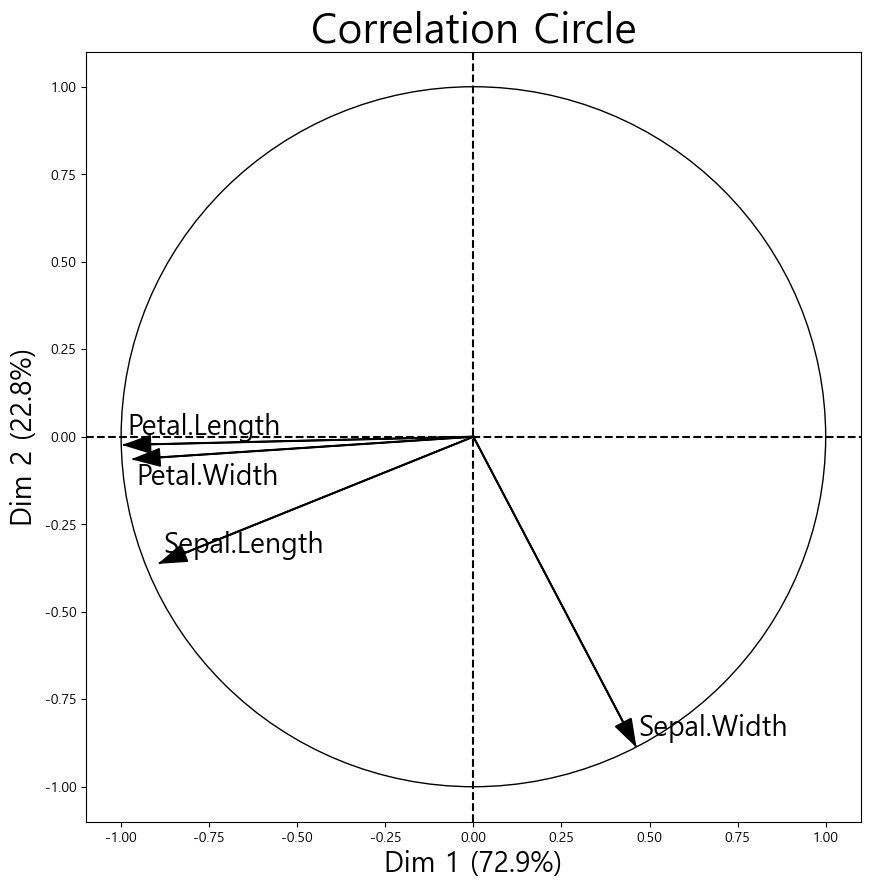

In [14]:
figure, corr_mat = plot_pca_correlation_graph( x_scaled,
                                               x_scaled.columns,
                                               dimensions=(1, 2),
                                               figure_axis_size=10)

print('< correlation_matrix >')
corr_mat

# LDA (Linear Discriminant Analysis)

# =================================

# SVD (Singular Value Decomposition)

# =================================

# NMF (Non-Negarive Matrix Factorization)

# =================================

# t-SNE (t-Distributed Stochastic Neighbor Embedding)

# =================================

# 요인 분석 (Factor Analysis)